In [ ]:
## This The Telco customer churn data contains information about a fictional telco company
##that provided home phone and Internet services to 7043 customers in California in Q3.
##It indicates which customers have left, stayed, or signed up for their service.
##Multiple important demographics are included for each customer, as well as a Satisfaction Score
##The analysis of the dataset is considered in to 4 phases.
## 1st phase is data analysis, 2nd phase is  variables analysis
## 3rd phase is building machine learning models
## Observations & validations

import pandas as pd
import numpy as np
url="/content/telco.csv"
df=pd.read_csv(url)
df=pd.DataFrame(df)
df.head(3)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer


In [ ]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [ ]:
df.shape

(7043, 50)

In [ ]:
### We have 7043 rows and 50 columns in the data frame

In [ ]:
### from the observation it is obvious that 1869 customers left the company

In [ ]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Under 30                              object
Senior Citizen                        object
Married                               object
Dependents                            object
Number of Dependents                   int64
Country                               object
State                                 object
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Population                             int64
Quarter                               object
Referred a Friend                     object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple L

In [ ]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040,4400.295755
std,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031,1183.057152
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000,2003.000000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000,3469.000000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000,4527.000000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000,5380.500000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000,6500.000000


In [ ]:
## I dont want to covert all the categorical varibale in to numercial variable
## based on the analysis requirement I want to consider for the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [ ]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Population                              0
Quarter                                 0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                  

In [ ]:
# Fill missing values for categorical columns with 'Unknown'
df['Offer'].fillna('Unknown', inplace=True)
df['Internet Type'].fillna('Unknown', inplace=True)
df['Churn Category'].fillna('Unknown', inplace=True)
df['Churn Reason'].fillna('Unknown', inplace=True)

In [ ]:
### Now we are doing column wise analysis and relationship understanding
## taking gender into consideration
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
df.shape

(7043, 8224)

In [ ]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
# Group by 'Number of Dependents' and sum 'Total Charges'
grouped_df = df.groupby('Number of Dependents')['Total Charges'].sum().reset_index()

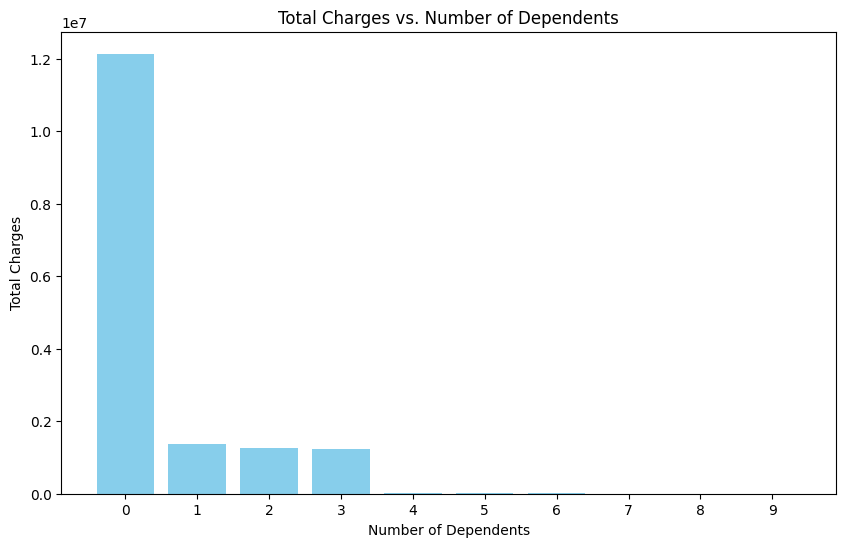

In [ ]:
## visulaization between No.of dependents Vs Total charges
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Number of Dependents'], grouped_df['Total Charges'], color='skyblue')
plt.xlabel('Number of Dependents')
plt.ylabel('Total Charges')
plt.title('Total Charges vs. Number of Dependents')
plt.xticks(grouped_df['Number of Dependents'])
plt.show()

### These are the action points that company wants to act immediately

In [ ]:
## From the above pictorical its obvious those are alone are utilizing the services to the maximum extent

In [ ]:
## considering the next factor age for the analysis
grouped_df_age = df.groupby('Age')['Avg Monthly GB Download'].sum().reset_index()

In [ ]:
df['Age'].value_counts()

Age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
66     63
78     63
67     61
72     58
Name: count, Length: 62, dtype: int64

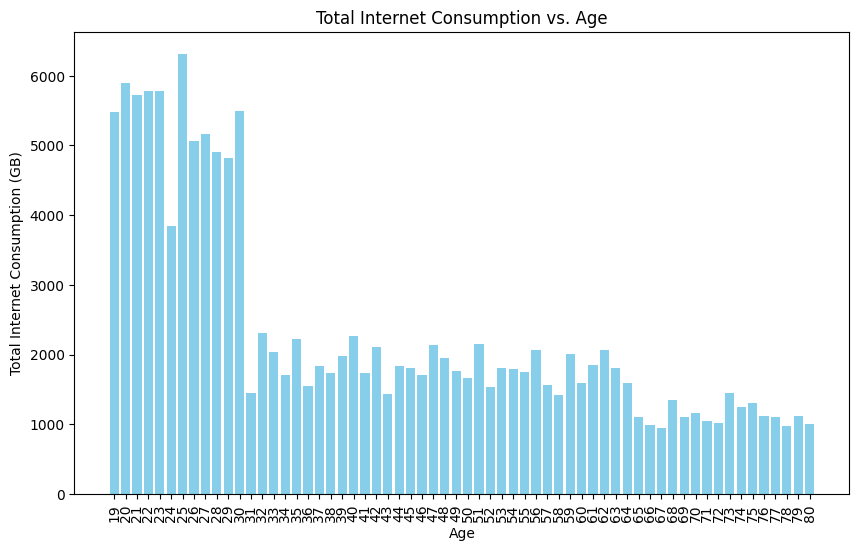

In [ ]:
## age wise internet consumption
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_age['Age'], grouped_df_age['Avg Monthly GB Download'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Total Internet Consumption (GB)')
plt.title('Total Internet Consumption vs. Age')
plt.xticks(grouped_df_age['Age'], rotation=90)  # Rotate x-ticks for better readability if there are many age categories
plt.show()

In [ ]:
## Need to bucket the age
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '60 & above']

# Create a new column 'Age Group' with the defined bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Group by 'Age Group' and sum 'Avg Monthly GB Download'
grouped_df_age = df.groupby('Age Group')['Avg Monthly GB Download'].sum().reset_index()

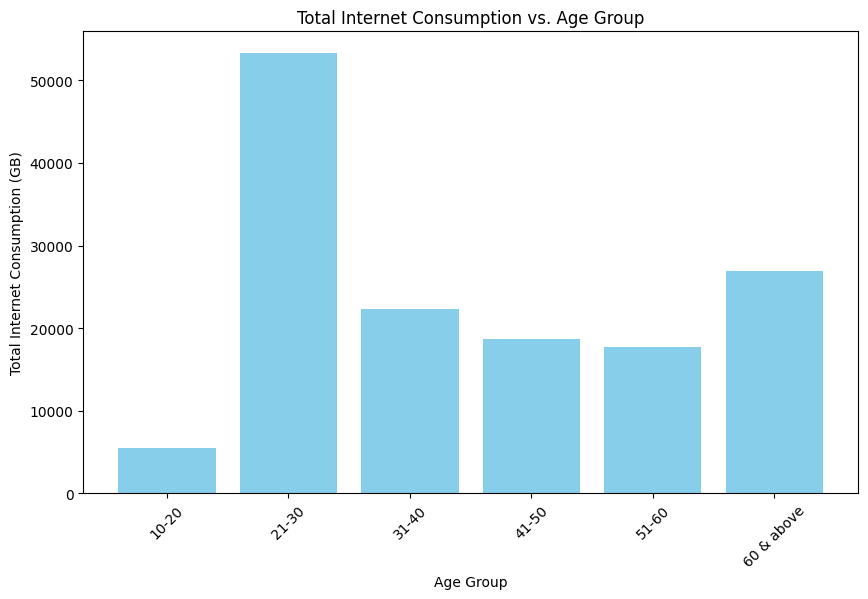

In [ ]:
## setting the age buckets in order to set the age buckets
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(grouped_df_age['Age Group'], grouped_df_age['Avg Monthly GB Download'], color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Total Internet Consumption (GB)')
plt.title('Total Internet Consumption vs. Age Group')
plt.xticks(rotation=45)  # Rotate x-ticks for better readability
plt.show()

In [ ]:
### The age group between 21-30 having the maximum utilization of the services

In [ ]:
## Now we will see the exact population count of this age group
df['Age Group'].value_counts()

Age Group
60 & above    1782
41-50         1342
21-30         1274
31-40         1266
51-60         1252
10-20          127
Name: count, dtype: int64

In [ ]:
### so total No.of customers and the % of the total
total=127+1252+1266+1274+1342+1782
total=7043
Younger_generation=1274 ## (21-30),18% of younger_generation corresponds to population
midage1=1266 ##(31-40), 17% of the middle age category 1 corresponds to the population
midage2=1342 ##(41-50), 19% of the middle age category 2 corresponds to the population
Babyboomers= 3,124 ## (51-60) & 60 above, 44% of the total population belongs to baby boomers


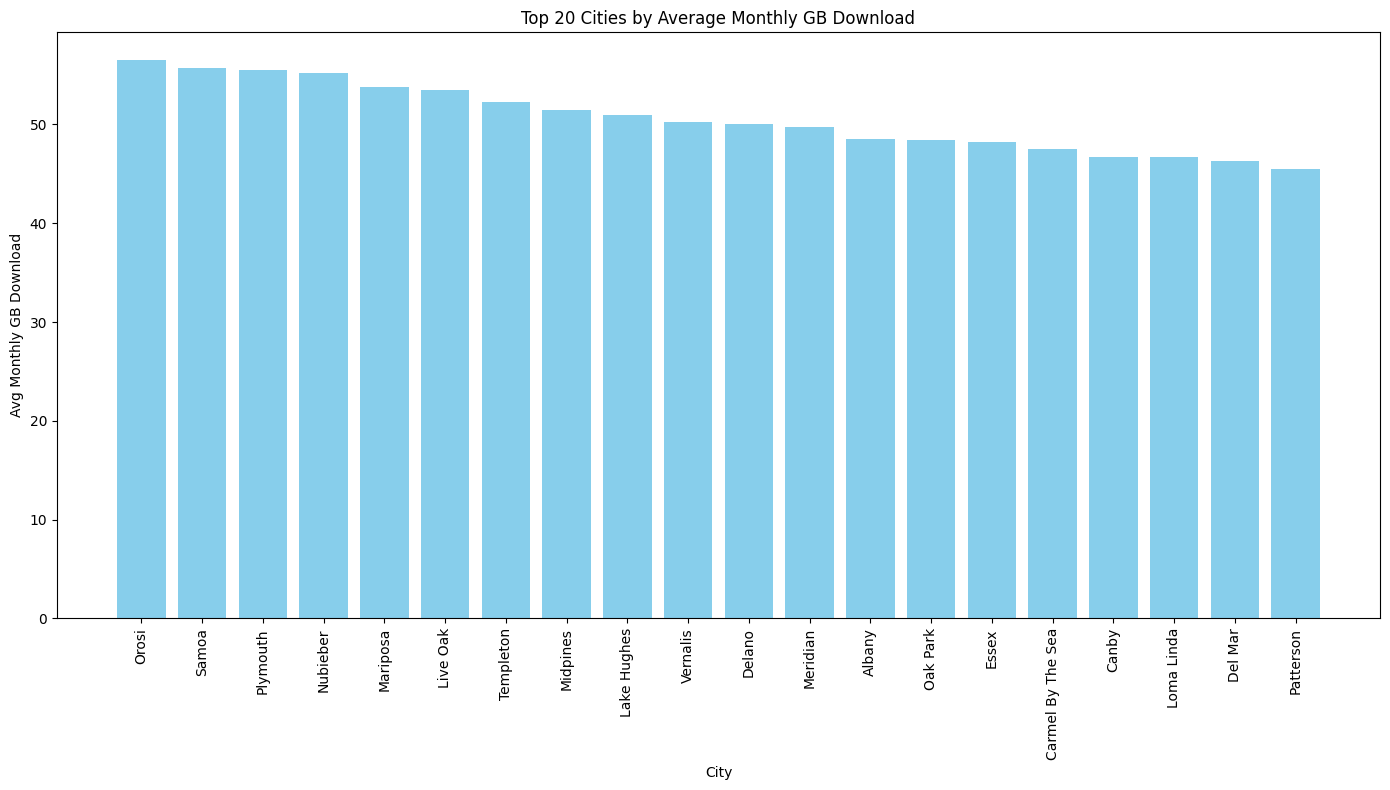

In [ ]:
## Analysis by city/ Zip code for the maximum customer base of top 20 cities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group by 'State' and 'City' and calculate the average 'Avg Monthly GB Download'
grouped_df = df.groupby(['State', 'City'])['Avg Monthly GB Download'].mean().reset_index()

# Sort by 'Avg Monthly GB Download' and select the top 20 cities
top_20_cities = grouped_df.sort_values(by='Avg Monthly GB Download', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(14, 8))
plt.bar(top_20_cities['City'], top_20_cities['Avg Monthly GB Download'], color='skyblue')

plt.xlabel('City')
plt.ylabel('Avg Monthly GB Download')
plt.title('Top 20 Cities by Average Monthly GB Download')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
## we are trying to find the correlation between number of referrals with the tenure of the months
import pandas as pd

# Assuming your data is still loaded in the dataframe 'df'

# Calculate the correlation coefficient between 'Number of Referrals' and 'Tenure in Months'
correlation = df['Number of Referrals'].corr(df['Tenure in Months'])

# Print the correlation coefficient
print("Correlation between 'Number of Referrals' and 'Tenure in Months':", correlation)

Correlation between 'Number of Referrals' and 'Tenure in Months': 0.3269745933581167


In [ ]:
## As you see we have weak correlation between "No. of Referrals" Vs "Tenure in months"
## Lets dig deeper
df['Number of Referrals'].value_counts()

Number of Referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64

In [ ]:
## The above is the referral status by the value counts
## "0", referrals from 3821 members
## 1 referrals given by the 1086 members
## 5 referrals given by the 264 members
## 3 referals given by the 255 members
### 7 referrals given by the 248 members


In [ ]:
## Now we are interested in seeing the no.of customers in the bin of the tenure
import pandas as pd

# Assuming your data is still loaded in the dataframe 'df'

# Define the number of bins (adjust as needed)
num_bins = 5

# Handle potential duplicates at max tenure (adjust bin_width if needed)
bin_width = int(df['Tenure in Months'].max() / num_bins)

# Create bin labels with one fewer label than bins (important!)
bin_labels = [f"{max(i, 1)}-{i+bin_width-1}" for i in range(0, df['Tenure in Months'].max(), bin_width)]

# Calculate bin edges
bin_edges = range(0, df['Tenure in Months'].max() + bin_width, bin_width)

# Discretize tenure into bins using cut
df['Tenure_Bin'] = pd.cut(df['Tenure in Months'], bins=bin_edges, labels=bin_labels, right=False, include_lowest=True)

# Count the number of customers in each bin
tenure_bin_counts = df['Tenure_Bin'].value_counts().sort_index()

# Print the counts
print(tenure_bin_counts)


Tenure_Bin
1-13     2295
14-27    1145
28-41     916
42-55     932
56-69    1104
70-83     651
Name: count, dtype: int64


In [ ]:
##Observations
### from the observation, it is obvious that total=7043, more than 48% of the customers lie in bracket of 1 to 27 months.
### nearly 32% of the customers are assocaited with the company less than year, just 13 months
#### so most of the refeerals happens by the customers who are associaed with the clients more than 3 years, that's the reason we have
#### 0.32 correlation between the duration of the customers with the referrals

### Segregation of the customers to Understand the Consumer Behaviour through Feature Engineering

In [ ]:
### Customer categorization for the analysis
### Customer segregation and relation ship between satisfaction score
#### I want to undersatnd the cutsomer catgory wise, so I have done the 2nd analysis
basic_services=['Phone Service','Multiple Lines','Internet Service']
executive_services =basic_services+ ['Online Security', 'Online Backup', 'Device Protection Plan']
premium_services = basic_services+executive_services + ['Premium Tech Support']
entertainment_services = basic_services+['Streaming TV', 'Streaming Movies', 'Streaming Music']

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
# Impute missing values using the most frequent strategy
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
# Convert categorical variables into numerical format using dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
# Define customer categories based on services opted for
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

# Create new columns for each customer category
df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

# Select features and target variable
features = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Perform Regression Analysis using Random Forest
# Fit a Random Forest Regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict satisfaction scores
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Train R2: {train_r2}')
print(f'Test MSE: {test_mse}')
print(f'Test R2: {test_r2}')

# Step 5: Predict Satisfaction Score
# Use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'Basic Services': [3],
    'Executive Services': [2],
    'Premium Services': [1],
    'Entertainment Services': [0]
})

predicted_satisfaction_score = regressor.predict(new_data)
print(f'Predicted Satisfaction Score: {predicted_satisfaction_score[0]}')

Train MSE: 1.3204248535845498
Train R2: 0.08793096195097383
Test MSE: 1.3327308218218366
Test R2: 0.06535904228763834
Predicted Satisfaction Score: 3.654793776434228


In [ ]:
## The result is categorized into train & test. Under the train we have the MSE is pretty decent.
### For both train & test we have MSE as 1.32 on average
### Once we consdier the relationship between the dependent variable & the independent variable we have very less score
### that is close to the zero

**Splitup of the results based on Sevices Offered**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
# Impute missing values using the most frequent strategy
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
# Convert categorical variables into numerical format using dummy variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
# Define customer categories based on services opted for
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

# Create new columns for each customer category
df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

# Select features and target variable
categories = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

# Step 4: Perform Regression Analysis for each category
results = {}

for category in categories:
    X = df[[category]]
    y = df[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit a Random Forest Regression model
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train, y_train)

    # Predict satisfaction scores
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)

    # Store the results
    results[category] = {
        'Train MSE': train_mse,
        'Train R2': train_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2
    }

# Print the results
for category, metrics in results.items():
    print(f'Category: {category}')
    print(f'Train MSE: {metrics["Train MSE"]}')
    print(f'Train R2: {metrics["Train R2"]}')
    print(f'Test MSE: {metrics["Test MSE"]}')
    print(f'Test R2: {metrics["Test R2"]}')
    print('---')

Category: Basic Services
Train MSE: 1.4008717379402604
Train R2: 0.03236315570348558
Test MSE: 1.382043663715458
Test R2: 0.0307760634742813
---
Category: Executive Services
Train MSE: 1.3847602735037845
Train R2: 0.04349197369736524
Test MSE: 1.3735986053722822
Test R2: 0.036698562818156866
---
Category: Premium Services
Train MSE: 1.3788579536037169
Train R2: 0.04756893666795625
Test MSE: 1.3667691662454935
Test R2: 0.04148803224557995
---
Category: Entertainment Services
Train MSE: 1.3836586587352262
Train R2: 0.04425290206033261
Test MSE: 1.3714175739074372
Test R2: 0.03822811500058243
---


In [ ]:
## Even if we do the analysis customer categorization, our observations are the same
## In the observations are the customer categories we can see the Mean square error is low and ranges from 1.37 to 1.40
## But the R2 is pretty low is almost zero
### Now we have following options to tune the model
###1. Add more features, 2. Model tuning, 3.Exploratory Data analysis, 4.Cross- Validation, 5.feature engineering
#### we have already added more features and feature engineering done. No big change can be brought under Exploratory data analysis
### and cross validation. So the option we have left is Model tuning. So lets try that

Improving the results through Ensemble Technic

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

categories = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

# Initialize models
models = {
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

results = {}

# Perform regression analysis for each category and model
for model_name, model in models.items():
    print(f"Model: {model_name}")
    for category in categories:
        X = df[[category]]
        y = df[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the model
        model.fit(X_train, y_train)

        # Predict satisfaction scores
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # Evaluate the model
        train_mse = mean_squared_error(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)

        # Cross-validation
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        cv_mean = np.mean(cv_scores)
        cv_std = np.std(cv_scores)

        # Store the results
        results[(model_name, category)] = {
            'Train MSE': train_mse,
            'Train R2': train_r2,
            'Test MSE': test_mse,
            'Test R2': test_r2,
            'CV Mean R2': cv_mean,
            'CV Std R2': cv_std
        }

# Print the results
for (model_name, category), metrics in results.items():
    print(f'Model: {model_name}, Category: {category}')
    print(f'Train MSE: {metrics["Train MSE"]}')
    print(f'Train R2: {metrics["Train R2"]}')
    print(f'Test MSE: {metrics["Test MSE"]}')
    print(f'Test R2: {metrics["Test R2"]}')
    print(f'CV Mean R2: {metrics["CV Mean R2"]}')
    print(f'CV Std R2: {metrics["CV Std R2"]}')
    print('---')

Model: Gradient Boosting
Model: XGBoost
Model: Random Forest
Model: AdaBoost
Model: Gradient Boosting, Category: Basic Services
Train MSE: 1.4008662938358667
Train R2: 0.03236691615910248
Test MSE: 1.3822372332613553
Test R2: 0.03064031361181907
CV Mean R2: -0.7402066533350091
CV Std R2: 0.3856221059093625
---
Model: Gradient Boosting, Category: Executive Services
Train MSE: 1.3847555685581623
Train R2: 0.04349522358713831
Test MSE: 1.3735789281518986
Test R2: 0.03671236240604314
CV Mean R2: -0.7363493134253835
CV Std R2: 0.38992469912611977
---
Model: Gradient Boosting, Category: Premium Services
Train MSE: 1.3788404132297347
Train R2: 0.04758105248960365
Test MSE: 1.3664039455049137
Test R2: 0.04174416068289277
CV Mean R2: -0.7370437115142698
CV Std R2: 0.3839102000764627
---
Model: Gradient Boosting, Category: Entertainment Services
Train MSE: 1.3836511687523003
Train R2: 0.04425807568418838
Test MSE: 1.3714968273625232
Test R2: 0.0381725347409001
CV Mean R2: -0.7199766380732253
CV 

In [ ]:
## I want to tune the model by GridSearchCV or RandomizedSearchCV to find the best parameters.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

categories = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

# Initialize parameter grids
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize models
models = {
    'Gradient Boosting': (GradientBoostingRegressor(), param_grid_gb),
    'XGBoost': (XGBRegressor(), param_grid_xgb),
    'Random Forest': (RandomForestRegressor(), param_grid_rf)
}

results = {}

# Perform hyperparameter tuning for each category and model
for model_name, (model, param_grid) in models.items():
    print(f"Model: {model_name}")
    for category in categories:
        X = df[[category]]
        y = df[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Perform GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Predict satisfaction scores
        y_pred_train = best_model.predict(X_train)
        y_pred_test = best_model.predict(X_test)

        # Evaluate the model
        train_mse = mean_squared_error(y_train, y_pred_train)
        train_r2 = r2_score(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)
        test_r2 = r2_score(y_test, y_pred_test)

        # Store the results
        results[(model_name, category)] = {
            'Best Params': grid_search.best_params_,
            'Train MSE': train_mse,
            'Train R2': train_r2,
            'Test MSE': test_mse,
            'Test R2': test_r2
        }

# Print the results
for (model_name, category), metrics in results.items():
    print(f'Model: {model_name}, Category: {category}')
    print(f'Best Params: {metrics["Best Params"]}')
    print(f'Train MSE: {metrics["Train MSE"]}')
    print(f'Train R2: {metrics["Train R2"]}')
    print(f'Test MSE: {metrics["Test MSE"]}')
    print(f'Test R2: {metrics["Test R2"]}')
    print('---')


Model: Gradient Boosting
Model: XGBoost
Model: Random Forest
Model: Gradient Boosting, Category: Basic Services
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Train MSE: 1.4008675384270173
Train R2: 0.032366056471366145
Test MSE: 1.382231082831627
Test R2: 0.03064462689356917
---
Model: Gradient Boosting, Category: Executive Services
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Train MSE: 1.3847584261077528
Train R2: 0.043493249765985786
Test MSE: 1.3734660669629266
Test R2: 0.036791511689621026
---
Model: Gradient Boosting, Category: Premium Services
Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Train MSE: 1.378842242613647
Train R2: 0.04757978886265779
Test MSE: 1.3663802118559991
Test R2: 0.04176080503446655
---
Model: Gradient Boosting, Category: Entertainment Services
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Train MSE: 1.3836562541335562
Train R2: 0.04425456301265884
Test M

**Visualization of the Fitment**

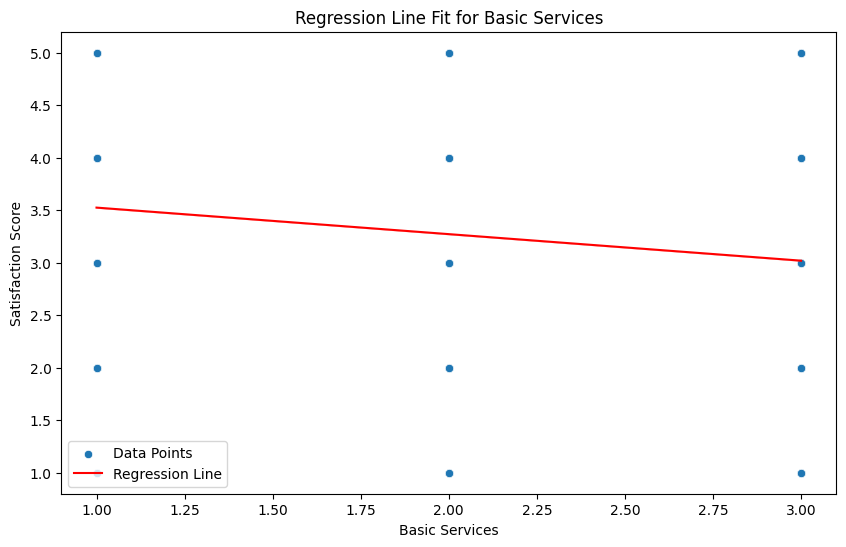

                            OLS Regression Results                            
Dep. Variable:     Satisfaction Score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           6.32e-45
Time:                        12:02:27   Log-Likelihood:                -11188.
No. Observations:                7043   AIC:                         2.238e+04
Df Residuals:                    7041   BIC:                         2.239e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.7776      0.040     94.

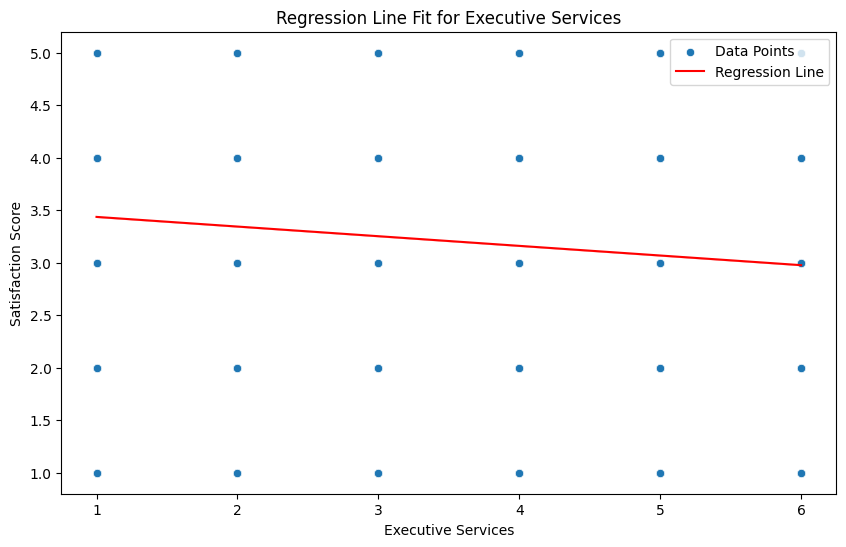

                            OLS Regression Results                            
Dep. Variable:     Satisfaction Score   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     94.19
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           3.94e-22
Time:                        12:02:30   Log-Likelihood:                -11240.
No. Observations:                7043   AIC:                         2.248e+04
Df Residuals:                    7041   BIC:                         2.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5284      0

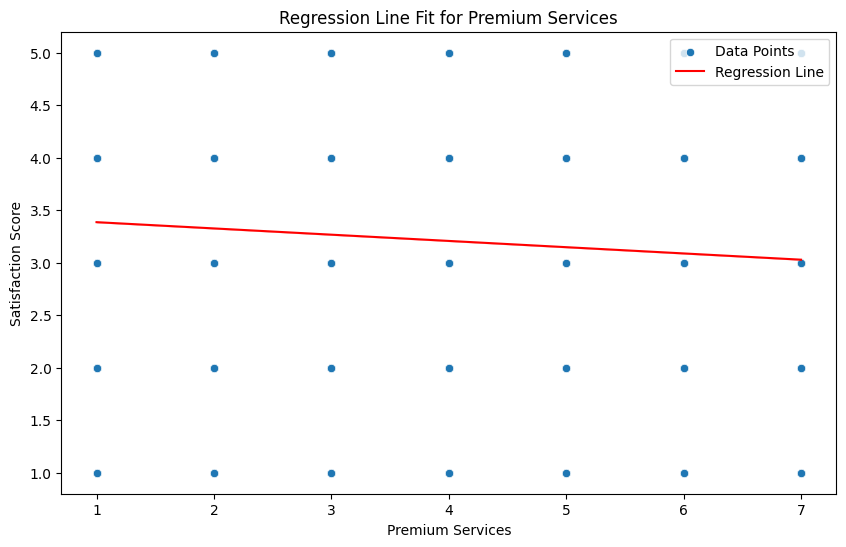

                            OLS Regression Results                            
Dep. Variable:     Satisfaction Score   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     52.68
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.34e-13
Time:                        12:02:32   Log-Likelihood:                -11261.
No. Observations:                7043   AIC:                         2.253e+04
Df Residuals:                    7041   BIC:                         2.254e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4458      0.031  

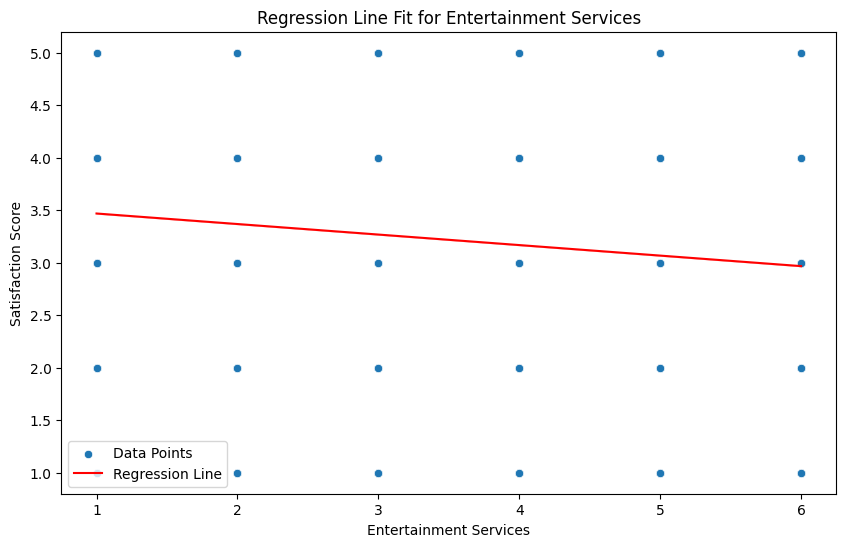

                            OLS Regression Results                            
Dep. Variable:     Satisfaction Score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     149.5
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.99e-34
Time:                        12:02:33   Log-Likelihood:                -11213.
No. Observations:                7043   AIC:                         2.243e+04
Df Residuals:                    7041   BIC:                         2.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

In [ ]:
## Lets look at the regression fitment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Load the dataset
url = "/content/telco.csv"
df = pd.read_csv(url)

# Step 1: Handle Missing Values
for col in ['Offer', 'Internet Type', 'Churn Category', 'Churn Reason']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 2: Convert Categorical Variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 3: Create Customer Categories
basic_services = ['Phone Service_Yes', 'Multiple Lines_Yes', 'Internet Service_Yes']
executive_services = basic_services + ['Online Security_Yes', 'Online Backup_Yes', 'Device Protection Plan_Yes']
premium_services = executive_services + ['Premium Tech Support_Yes']
entertainment_services = basic_services + ['Streaming TV_Yes', 'Streaming Movies_Yes', 'Streaming Music_Yes']

df['Basic Services'] = df[basic_services].sum(axis=1)
df['Executive Services'] = df[executive_services].sum(axis=1)
df['Premium Services'] = df[premium_services].sum(axis=1)
df['Entertainment Services'] = df[entertainment_services].sum(axis=1)

categories = ['Basic Services', 'Executive Services', 'Premium Services', 'Entertainment Services']
target = 'Satisfaction Score'

# Function to fit linear regression and plot
def plot_regression_line(category, X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[category], y=y, label='Data Points')
    sns.lineplot(x=X[category], y=predictions, color='red', label='Regression Line')
    plt.title(f'Regression Line Fit for {category}')
    plt.xlabel(category)
    plt.ylabel('Satisfaction Score')
    plt.legend()
    plt.show()

    print(model.summary())

# Plot regression lines for each category
for category in categories:
    X = df[[category]]
    y = df[target]
    plot_regression_line(category, X, y)

In [ ]:
### No big difference in the out put.
### Lets get much much deeper in to the root cause


### **Dependent Variable** **analysis**

In [ ]:

df[['Churn Category','Churn Reason','Churn Score', 'CLTV','Satisfaction Score', 'Customer Status', 'Churn Label']]

,Churn Category,Churn Reason,Churn Score,CLTV,Satisfaction Score,Customer Status,Churn Label
0,Competitor,Competitor offered more data,91,5433,3,Churned,Yes
1,Competitor,Competitor made better offer,69,5302,3,Churned,Yes
2,Competitor,Competitor made better offer,81,3179,2,Churned,Yes
3,Dissatisfaction,Limited range of services,88,5337,2,Churned,Yes
4,Price,Extra data charges,67,2793,2,Churned,Yes
...,...,...,...,...,...,...,...
7038,Unknown,Unknown,45,5306,5,Stayed,No
7039,Unknown,Unknown,59,2140,3,Stayed,No
7040,Unknown,Unknown,71,5560,4,Stayed,No
7041,Unknown,Unknown,59,2793,4,Stayed,No


In [ ]:
df['Churn Category'].value_counts()

Churn Category
Unknown            5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64

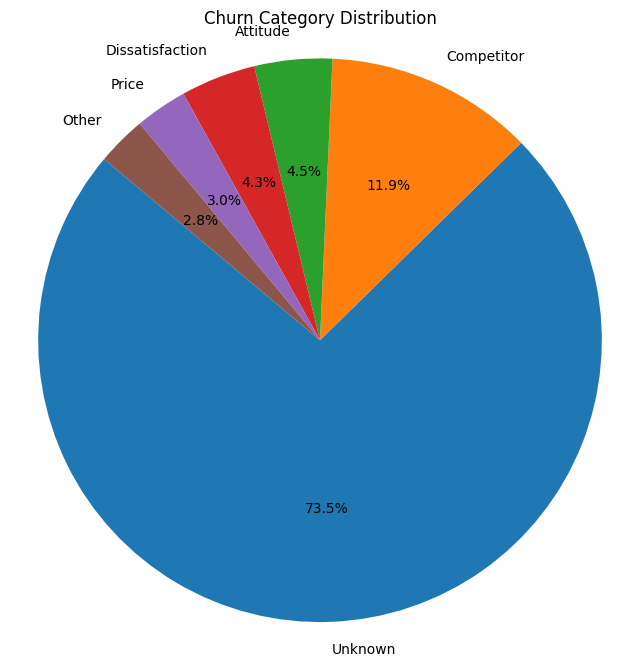

In [ ]:
import matplotlib.pyplot as plt

# Count the values in the 'Churn Category' column
churn_counts = df['Churn Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df['Churn Reason'].value_counts()

Churn Reason
Unknown                                      5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support      

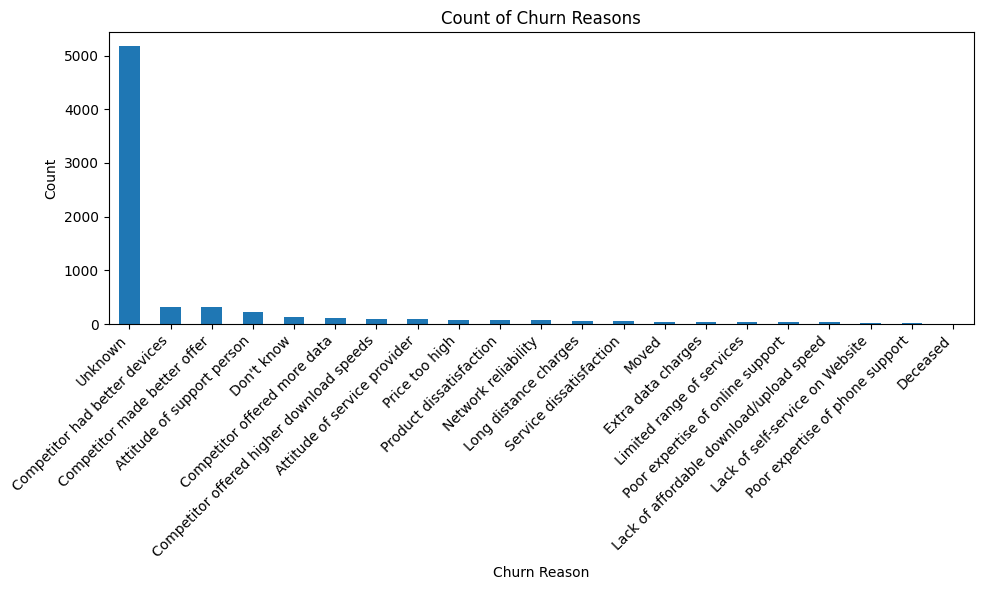

In [ ]:
import matplotlib.pyplot as plt

# Assuming df['Churn Reason'] contains the Churn Reason data
churn_reason_counts = df['Churn Reason'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
churn_reason_counts.plot(kind='bar')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.title('Count of Churn Reasons')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [ ]:
df[['Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason']]

,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,2,Churned,Yes,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...
7038,5,Stayed,No,45,5306,Unknown,Unknown
7039,3,Stayed,No,59,2140,Unknown,Unknown
7040,4,Stayed,No,71,5560,Unknown,Unknown
7041,4,Stayed,No,59,2793,Unknown,Unknown


In [ ]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64

In [ ]:
### More than 2665 no.of people have given satisfaction score to 3
#### More than 1440 people have given score that is equal to 1 and 2

In [ ]:
df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [ ]:
## I want to find the relationship between these 2 variables satisfaction score & customer status
### Anova analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model
model = ols('Q("Satisfaction Score") ~ C(Q("Customer Status"))', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                              sum_sq      df           F  PR(>F)
C(Q("Customer Status"))  5807.701289     2.0  4687.92109     0.0
Residual                 4360.804746  7040.0         NaN     NaN


In [ ]:
## No reasonable output

In [ ]:
### Chi-square test
from scipy.stats import chi2_contingency

# Create a crosstab
crosstab = pd.crosstab(df['Satisfaction Score'], df['Customer Status'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Print the results
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

Chi2 Statistic: 5235.589202739663
P-value: 0.0
Degrees of Freedom: 8
Expected Frequencies: 
[[ 244.67102087   59.43319608  617.89578305]
 [ 137.46159307   33.39088457  347.14752236]
 [ 707.21070567  171.78901036 1786.00028397]
 [ 474.74669885  115.32102797 1198.93227318]
 [ 304.90998154   74.06588102  770.02413744]]


In [ ]:
## Chi2 Statistic: The chi-square statistic is 5235.589202739663, which indicates a significant association between 'Satisfaction Score' and 'Customer Status'.
### P-value: The p-value is 0.0, which is less than 0.05, indicating that the association between 'Satisfaction Score' and 'Customer Status' is statistically significant.

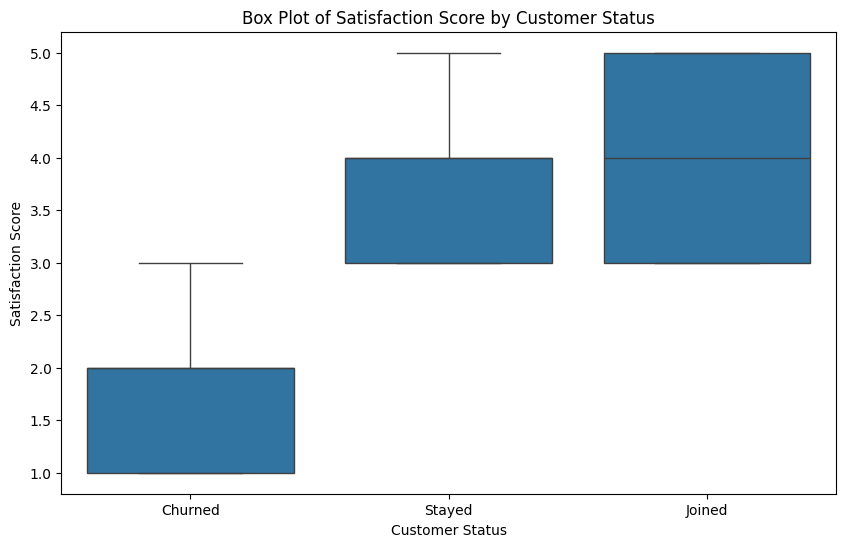

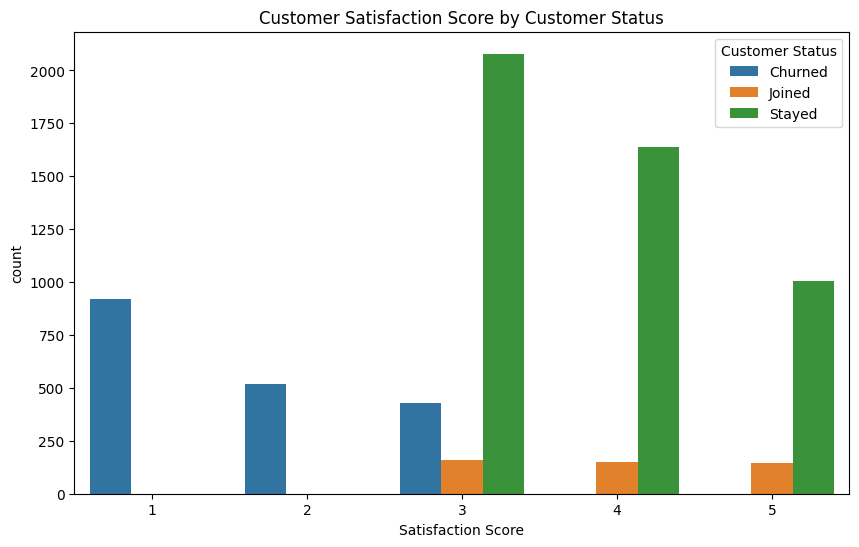

In [ ]:
### Box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Customer Status', y='Satisfaction Score')
plt.title('Box Plot of Satisfaction Score by Customer Status')
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Satisfaction Score', hue='Customer Status')
plt.title('Customer Satisfaction Score by Customer Status')
plt.show()

In [ ]:
#### Box plot seems to be very logical, the satisfaction score equal to and below 3 need to be checked
## The satisfaction score those are above 3, seems to be with the company

In [ ]:
df.groupby('Customer Status')['Satisfaction Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Customer Status,,,,,,,,
Churned,1869.0,1.736223,0.808466,1.0,1.0,2.0,2.0,3.0
Joined,454.0,3.973568,0.816068,3.0,3.0,4.0,5.0,5.0
Stayed,4720.0,3.772246,0.775521,3.0,3.0,4.0,4.0,5.0


In [ ]:
### this is clear explanation that the score from 1.73 and lessthan 3 have left the company
#### the score that are above 3 have stayed in the company

**Analysis through Histogram & Logistics regression**

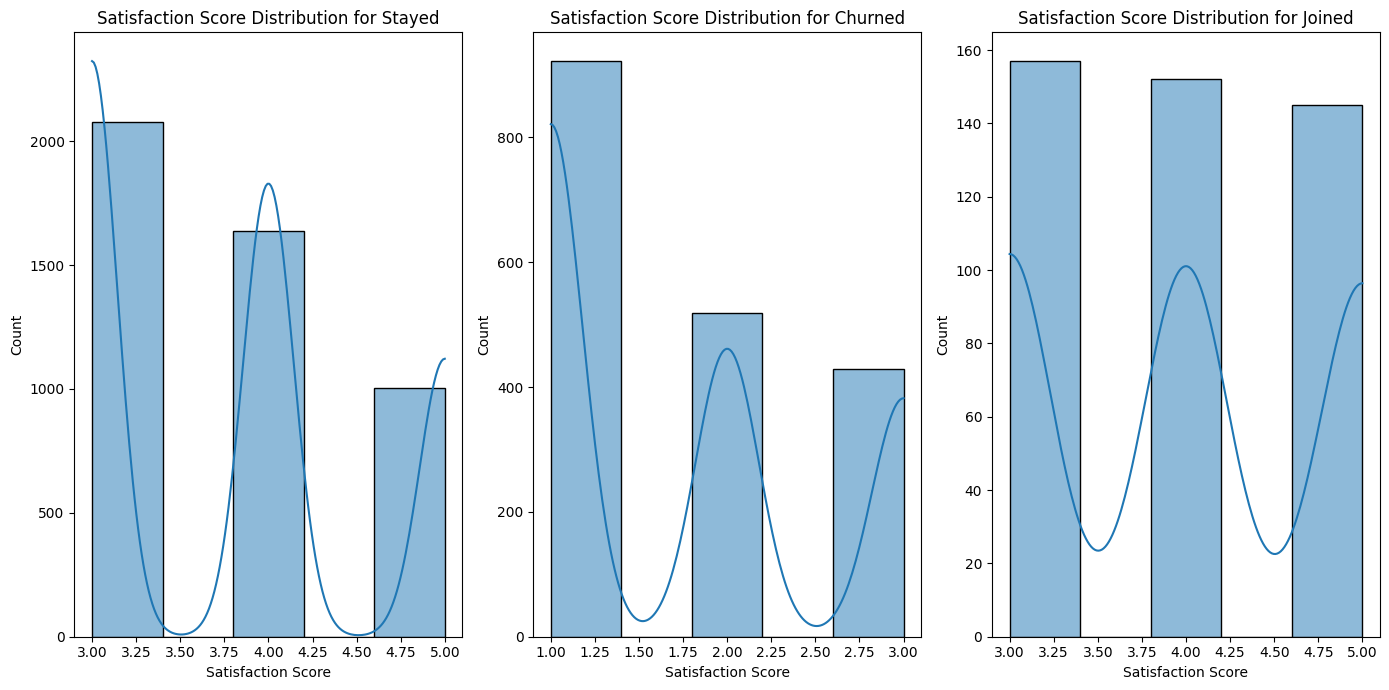

In [ ]:
plt.figure(figsize=(14, 7))

# Histogram for 'Stayed'
plt.subplot(1, 3, 1)
sns.histplot(df[df['Customer Status'] == 'Stayed']['Satisfaction Score'], bins=5, kde=True)
plt.title('Satisfaction Score Distribution for Stayed')

# Histogram for 'Churned'
plt.subplot(1, 3, 2)
sns.histplot(df[df['Customer Status'] == 'Churned']['Satisfaction Score'], bins=5, kde=True)
plt.title('Satisfaction Score Distribution for Churned')

# Histogram for 'Joined'
plt.subplot(1, 3, 3)
sns.histplot(df[df['Customer Status'] == 'Joined']['Satisfaction Score'], bins=5, kde=True)
plt.title('Satisfaction Score Distribution for Joined')

plt.tight_layout()
plt.show()


In [ ]:
### Logistics regression
import statsmodels.api as sm

# Create a binary variable for 'Customer Status' (1 if 'Churned', 0 if 'Stayed')
df['Churned'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

# Fit the logistic regression model
X = df['Satisfaction Score']
y = df['Churned']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()

# Print the summary
print(model.summary())

         Current function value: 0.166977
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.7114
Time:                        14:36:54   Log-Likelihood:                -1176.0
converged:                      False   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 69.5509   7748.608      0.009      0.993   -1.51e+04    1.53e+04
Satisfaction Score   -23.7340   2582.869 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
### Inferences:
##Warning: Maximum number of iterations has been exceeded:
##This suggests that the model did not converge within the default number of iterations, meaning it could not find a stable solution.
##Current function value: 0.166977, Iterations: 35:
##The optimization process was stopped after 35 iterations.
## Coefficients (coef):
## The coefficient for 'Satisfaction Score' is -23.7340 with a very large standard error of 2582.869, leading to an insignificant p-value of 0.993.
##The constant term also has a very large standard error, indicating instability in the estimates.

In [ ]:
### Increase the Maximum Number of Iterations:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Satisfaction Score']])
X_scaled = sm.add_constant(X_scaled)

model = sm.Logit(y, X_scaled).fit()
print(model.summary())

         Current function value: 0.166977
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7041
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.7114
Time:                        14:45:58   Log-Likelihood:                -1176.0
converged:                      False   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3547    506.118     -0.015      0.988    -999.327     984.618
x1           -27.9820   2482.960     -0.011      0.991   -4894.49

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
### Now we are working on the I want to group by satisfaction score equal and less than 3 and see along with the customer status and churn score

# Create a new column 'Low_Satisfaction' where 1 indicates satisfaction score <= 3, and 0 otherwise
df['Low_Satisfaction'] = df['Satisfaction Score'].apply(lambda x: 1 if x <= 3 else 0)

In [ ]:
## Count Customer Status by Low_Satisfaction
status_counts = df.groupby(['Low_Satisfaction', 'Customer Status']).size().unstack(fill_value=0)
print(status_counts)

Customer Status   Churned  Joined  Stayed
Low_Satisfaction                         
0                       0     297    2641
1                    1869     157    2079


In [ ]:
## Calculate Summary Statistics for Churn Score
churn_stats = df.groupby('Low_Satisfaction')['Churn Score'].agg(['mean', 'median', 'std', 'count'])
print(churn_stats)

                       mean  median        std  count
Low_Satisfaction                                     
0                 50.234854    51.0  17.580516   2938
1                 64.424117    69.0  21.536352   4105


In [ ]:
## Combining the Results
# Resetting the index to merge the DataFrames
status_counts_reset = status_counts.reset_index()
churn_stats_reset = churn_stats.reset_index()

# Merging the DataFrames on 'Low_Satisfaction'
combined_data = pd.merge(status_counts_reset, churn_stats_reset, on='Low_Satisfaction')
print(combined_data)

   Low_Satisfaction  Churned  Joined  Stayed       mean  median        std  \
0                 0        0     297    2641  50.234854    51.0  17.580516   
1                 1     1869     157    2079  64.424117    69.0  21.536352   

   count  
0   2938  
1   4105  


In [ ]:
### Very important observation, the people who gave 0 & 1 score later joined and stayed, what is the reason behind


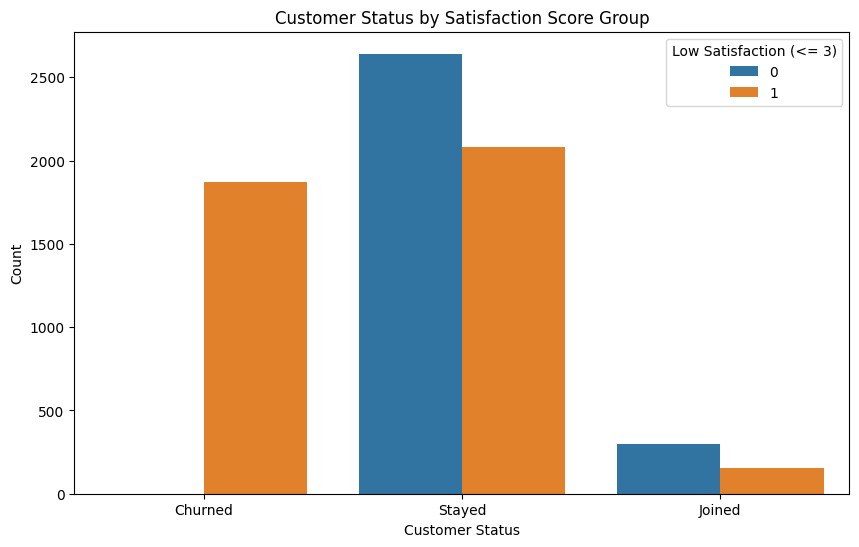

In [ ]:
### Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Status', hue='Low_Satisfaction', data=df)
plt.title('Customer Status by Satisfaction Score Group')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.legend(title='Low Satisfaction (<= 3)')
plt.show()

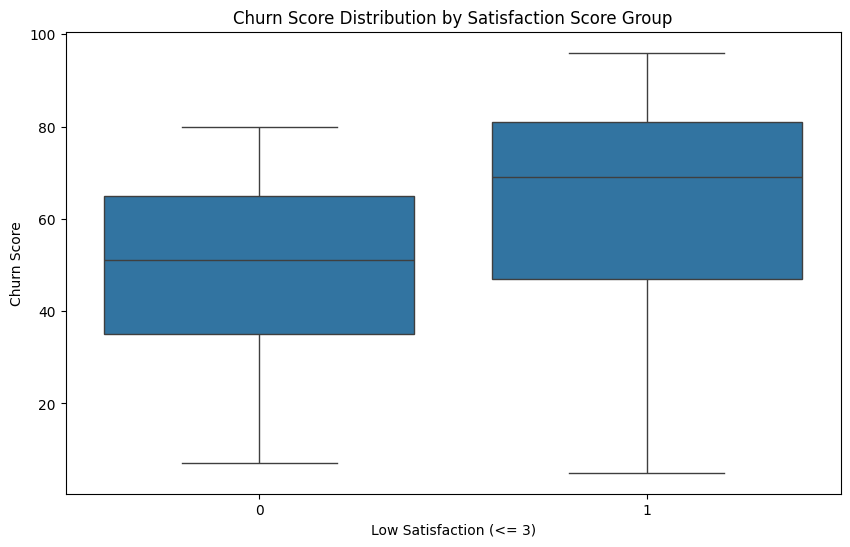

In [ ]:
###Box Plot for Churn Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Low_Satisfaction', y='Churn Score', data=df)
plt.title('Churn Score Distribution by Satisfaction Score Group')
plt.xlabel('Low Satisfaction (<= 3)')
plt.ylabel('Churn Score')
plt.show()

In [ ]:
##Summary Statistics
summary_stats = df.groupby('Low_Satisfaction')['Churn Score'].describe()
print(summary_stats)

                   count       mean        std  min   25%   50%   75%   max
Low_Satisfaction                                                           
0                 2938.0  50.234854  17.580516  7.0  35.0  51.0  65.0  80.0
1                 4105.0  64.424117  21.536352  5.0  47.0  69.0  81.0  96.0


### Undersatnding the reasons why customers gave less score

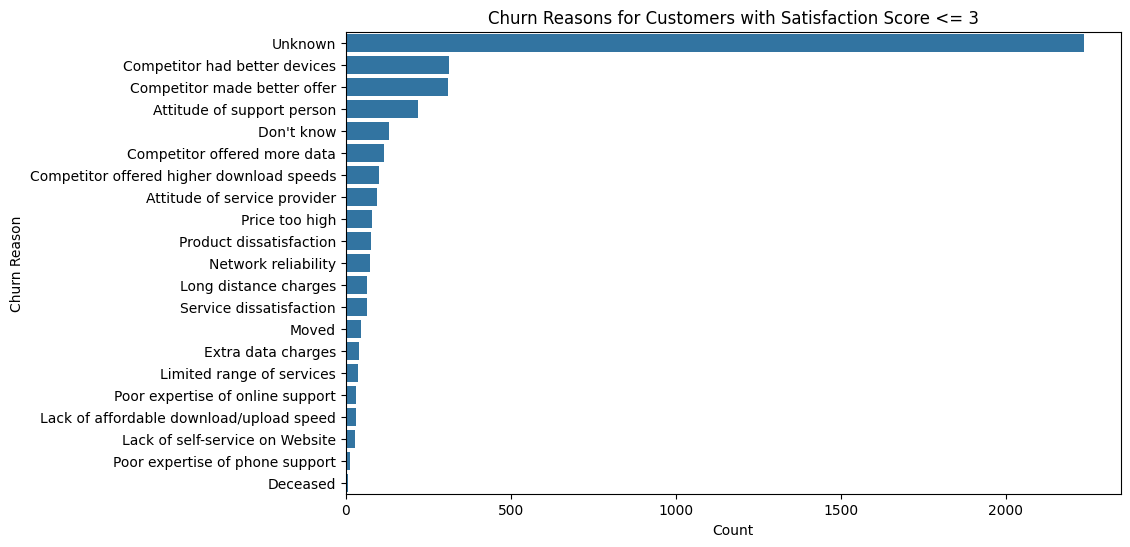

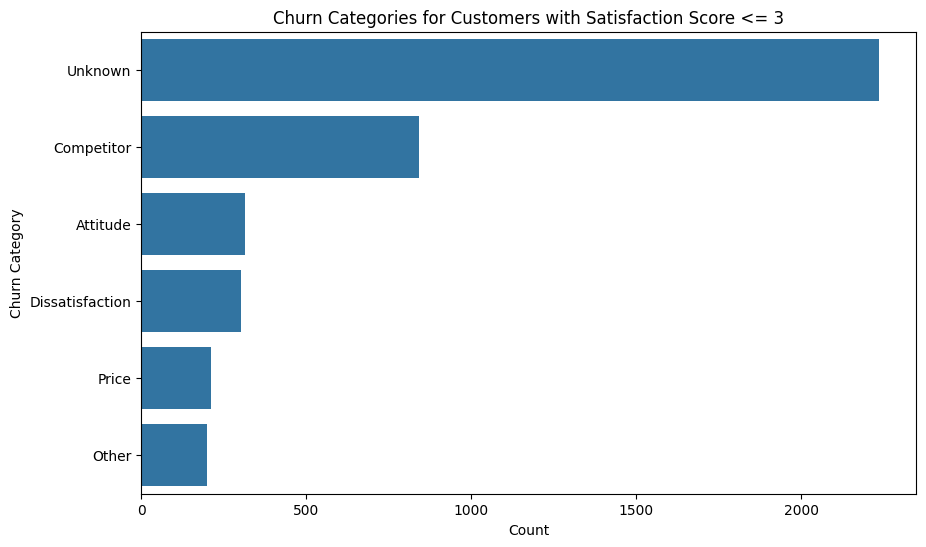

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been previously defined
# Create a new column 'Low_Satisfaction' where 1 indicates satisfaction score <= 3, and 0 otherwise
df['Low_Satisfaction'] = df['Satisfaction Score'].apply(lambda x: 1 if x <= 3 else 0)

# Filter the DataFrame for customers with satisfaction scores less than or equal to 3
low_satisfaction_df = df[df['Satisfaction Score'] <= 3]

# Bar Chart for Churn Reason
plt.figure(figsize=(10, 6))
sns.countplot(y='Churn Reason', data=low_satisfaction_df, order=low_satisfaction_df['Churn Reason'].value_counts().index)
plt.title('Churn Reasons for Customers with Satisfaction Score <= 3')
plt.xlabel('Count')
plt.ylabel('Churn Reason')
plt.show()

# Bar Chart for Churn Category
plt.figure(figsize=(10, 6))
sns.countplot(y='Churn Category', data=low_satisfaction_df, order=low_satisfaction_df['Churn Category'].value_counts().index)
plt.title('Churn Categories for Customers with Satisfaction Score <= 3')
plt.xlabel('Count')
plt.ylabel('Churn Category')
plt.show()

### Decoding the geographical location of the customers where the score is less than 3

State Counts:
 State
California    1440
Name: count, dtype: int64
City Counts:
 City
San Diego         130
Los Angeles        62
San Francisco      23
San Jose           21
Fallbrook          20
                 ... 
West Point          1
Valley Springs      1
Linden              1
Alviso              1
Ocotillo            1
Name: count, Length: 669, dtype: int64


<ipython-input-135-33ae2a917b57>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette='viridis')


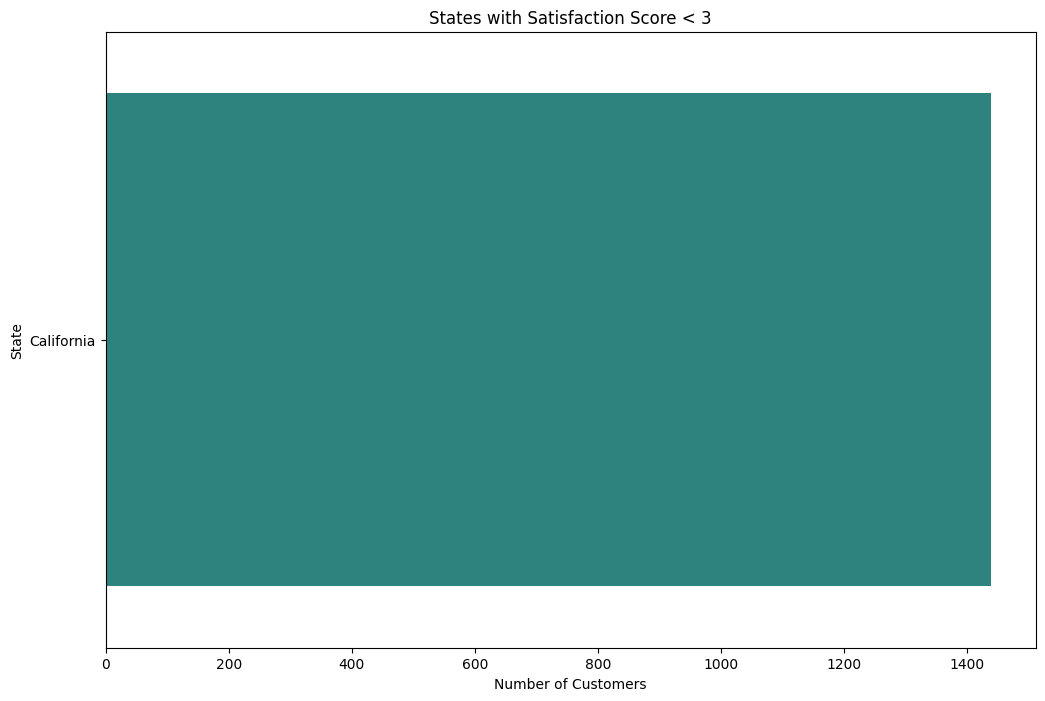

<ipython-input-135-33ae2a917b57>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')


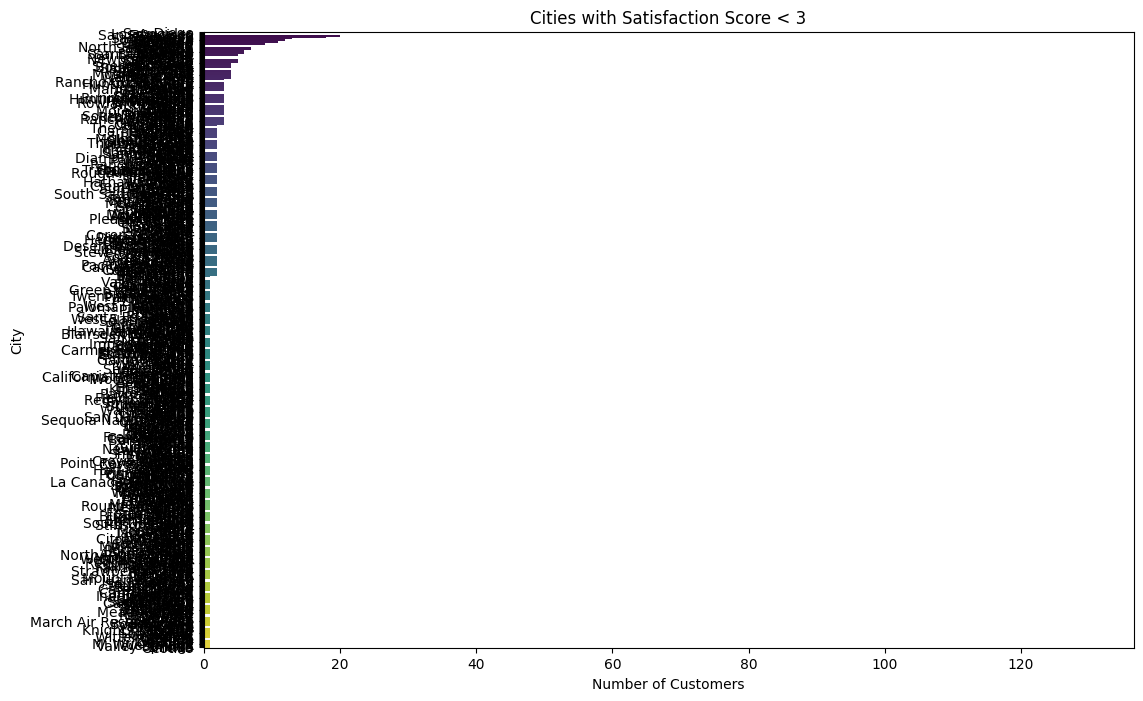

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has been previously defined

# Filter the DataFrame for customers with satisfaction scores less than 3
low_satisfaction_df = df[df['Satisfaction Score'] < 3]

# Group by State
state_counts = low_satisfaction_df['State'].value_counts()
print("State Counts:\n", state_counts)

# Group by City
city_counts = low_satisfaction_df['City'].value_counts()
print("City Counts:\n", city_counts)

# Bar Chart for State
plt.figure(figsize=(12, 8))
sns.barplot(y=state_counts.index, x=state_counts.values, palette='viridis')
plt.title('States with Satisfaction Score < 3')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()

# Bar Chart for City
plt.figure(figsize=(12, 8))
sns.barplot(y=city_counts.index, x=city_counts.values, palette='viridis')
plt.title('Cities with Satisfaction Score < 3')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()

#### TOP 20 cities

<ipython-input-136-2b0a2b98d4bc>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')


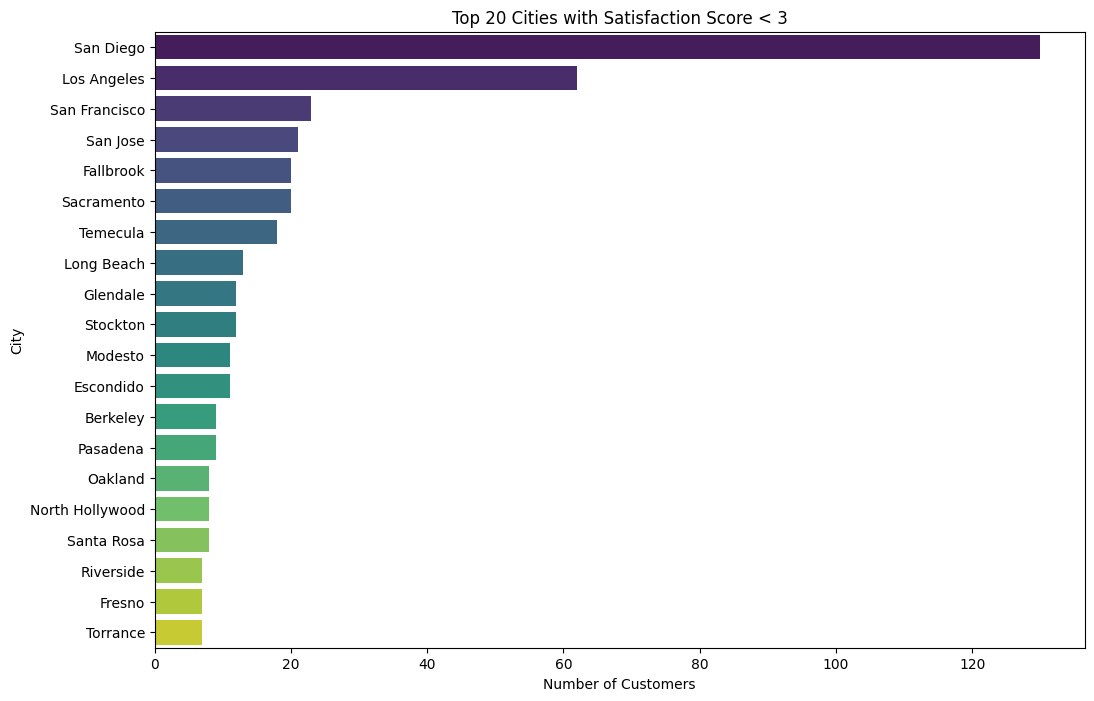

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has been previously defined

# Filter the DataFrame for customers with satisfaction scores less than 3
low_satisfaction_df = df[df['Satisfaction Score'] < 3]

# Group by City and get the top 20 cities with the most customers having low satisfaction scores
top_cities = low_satisfaction_df['City'].value_counts().head(20)

# Bar Chart for Top 20 Cities
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities.index, x=top_cities.values, palette='viridis')
plt.title('Top 20 Cities with Satisfaction Score < 3')
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.show()